## Imports

In [ ]:
# necessary libraries
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [ ]:
# load data
(train_feature, train_labels), (test_feature, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(train_feature.shape)
test_feature.shape

(60000, 28, 28)


(10000, 28, 28)

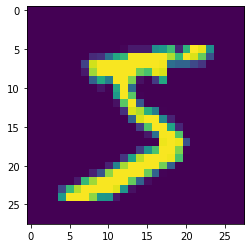

In [ ]:
train_feature[0]
plt.imshow(train_feature[0])

Reshape

In [ ]:
train_feature = train_feature.reshape((60000, 28, 28, 1))
test_feature = test_feature.reshape((10000, 28, 28, 1))

encoding to catagorical (one hot encoding)

In [ ]:
print(test_labels[0])

7


In [ ]:
train_labels_ohe = to_categorical(train_labels)
test_labels_ohe = to_categorical(test_labels)

In [ ]:
print(test_labels_ohe[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


## Model

intialize model

In [ ]:
model = Sequential()

Adding layers

In [ ]:
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

Compile

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
modelfit = model.fit(train_feature, train_labels_ohe, validation_data=(test_feature, test_labels_ohe), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2167 - accuracy: 0.9528 - val_loss: 0.0982 - val_accuracy: 0.9721
Epoch 2/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0640 - accuracy: 0.9813 - val_loss: 0.0858 - val_accuracy: 0.9747
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0436 - accuracy: 0.9863 - val_loss: 0.0799 - val_accuracy: 0.9780
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0321 - accuracy: 0.9906 - val_loss: 0.0866 - val_accuracy: 0.9775
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0282 - accuracy: 0.9914 - val_loss: 0.0858 - val_accuracy: 0.9810


visualization

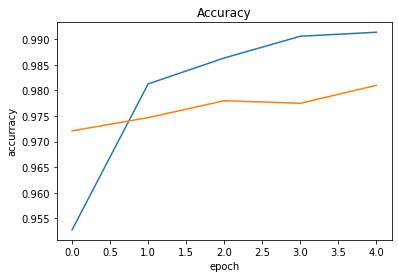

In [ ]:
plt.plot(modelfit.history['accuracy'])
plt.plot(modelfit.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel("epoch")
plt.ylabel("accurracy")
plt.show()

In [ ]:
prediction = model.predict(test_feature[5:10])
print(np.argmax(prediction, axis=1))

[1 4 9 5 9]


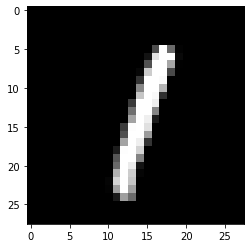

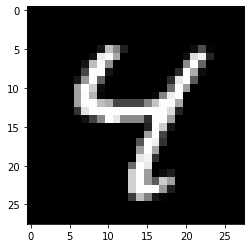

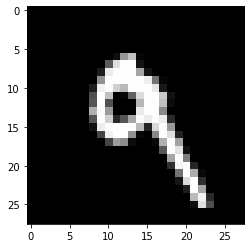

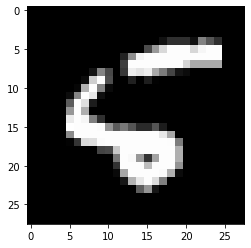

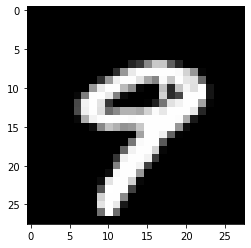

In [ ]:
for i in range(5, 10):
  img = test_feature[i]
  img = np.array(img, dtype=float)
  img = img.reshape((28, 28))
  plt.imshow(img, cmap='gray')
  plt.show()

In [ ]:
import tensorflow

In [ ]:
tensorflow.keras.models.save_model(model, 'mymodel_cnn.hdf5')

# getting sample images

In [ ]:
import cv2

In [ ]:
test_labels[60:70]

array([7, 8, 9, 3, 7, 4, 6, 4, 3, 0], dtype=uint8)

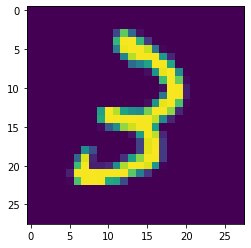

In [ ]:
img = test_feature[63]
img = np.array(img, dtype=float)
img = img.reshape((28, 28))
plt.imshow(img)

In [ ]:
cv2.imwrite('3.png',img)

True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')